In [3]:
# 📓 04_eda_creditcard.ipynb

# === 1. Imports and Setup ===
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

sys.path.append(os.path.abspath("../"))
from src.config import CREDITCARD_CLEANED_PATH
from src.utils import load_csv

# Set style and figure directory
sns.set(style="whitegrid")
FIG_DIR = os.path.abspath("../reports/figures/creditcard_fig")
os.makedirs(FIG_DIR, exist_ok=True)

def save_plot(fig, filename):
    fig.savefig(os.path.join(FIG_DIR, filename), bbox_inches="tight")
    print(f"Saved: {filename}")


In [4]:
# === 2. Load Data ===
credit_df = load_csv(CREDITCARD_CLEANED_PATH)
print(f" Shape: {credit_df.shape}")
print(credit_df.head())


[INFO] Loaded data: C:\Users\yitbie\Desktop\10A\project\fraud-detection-project\data\processed\creditcard_cleaned.csv | Shape: (284807, 31)
 Shape: (284807, 31)
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.10

Saved: cc_target_distribution.png


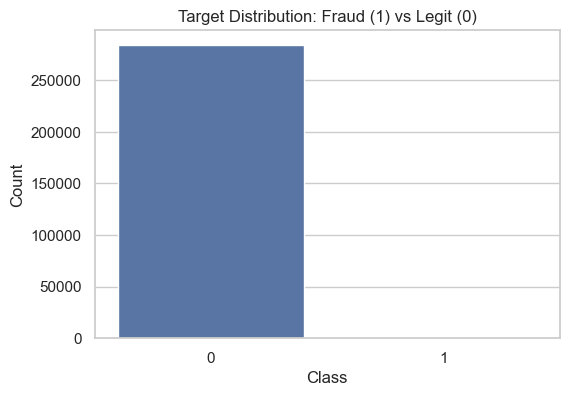

 Fraud Rate: 0.1727%


In [5]:
# === Target Distribution ===
fig, ax = plt.subplots(figsize=(6, 4))
sns.countplot(data=credit_df, x='Class', ax=ax)
ax.set_title("Target Distribution: Fraud (1) vs Legit (0)")
ax.set_xlabel("Class")
ax.set_ylabel("Count")
save_plot(fig, "cc_target_distribution.png")
plt.show()

fraud_rate = credit_df['Class'].mean() * 100
print(f" Fraud Rate: {fraud_rate:.4f}%")


Saved: cc_amount_distribution.png


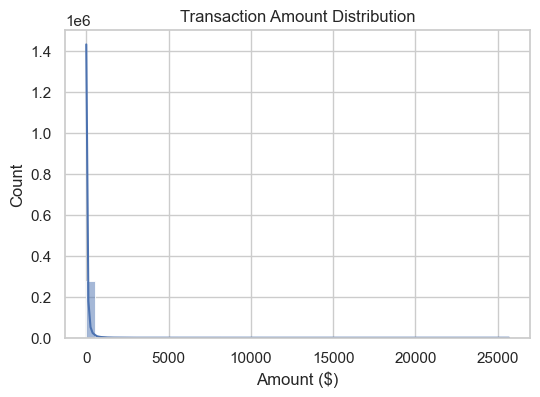

In [6]:
# === Distribution of Amount ===
fig, ax = plt.subplots(figsize=(6, 4))
sns.histplot(credit_df['Amount'], bins=50, kde=True, ax=ax)
ax.set_title("Transaction Amount Distribution")
ax.set_xlabel("Amount ($)")
save_plot(fig, "cc_amount_distribution.png")
plt.show()


Saved: cc_time_distribution.png


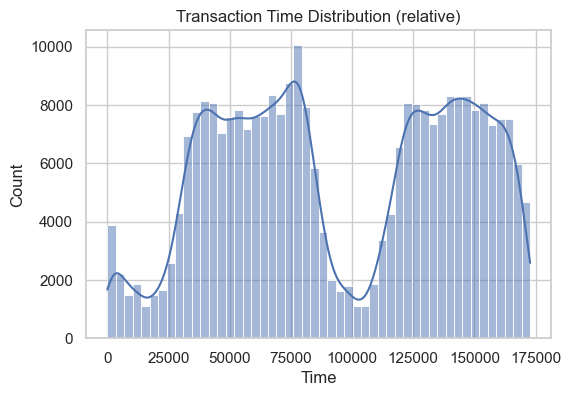

In [7]:
# === Distribution of Time (seconds from first transaction) ===
fig, ax = plt.subplots(figsize=(6, 4))
sns.histplot(credit_df['Time'], bins=50, kde=True, ax=ax)
ax.set_title("Transaction Time Distribution (relative)")
save_plot(fig, "cc_time_distribution.png")
plt.show()


Saved: cc_amount_by_class.png


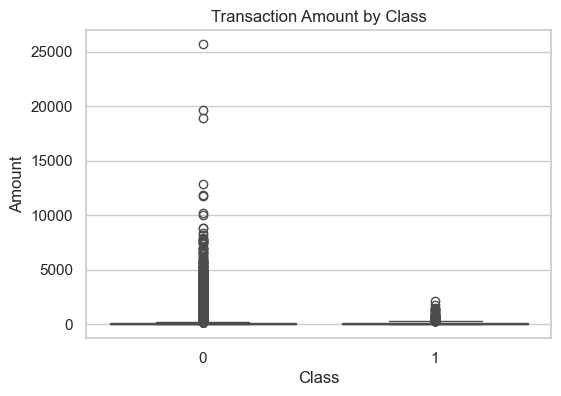

In [8]:
# === Boxplot: Amount vs Class ===
fig, ax = plt.subplots(figsize=(6, 4))
sns.boxplot(data=credit_df, x='Class', y='Amount', ax=ax)
ax.set_title("Transaction Amount by Class")
save_plot(fig, "cc_amount_by_class.png")
plt.show()


Top Correlated Features with Fraud:
V17   -0.326481
V14   -0.302544
V12   -0.260593
V10   -0.216883
V16   -0.196539
V3    -0.192961
V7    -0.187257
V11    0.154876
V4     0.133447
V18   -0.111485
Name: Class, dtype: float64
Saved: cc_top_corr_features.png


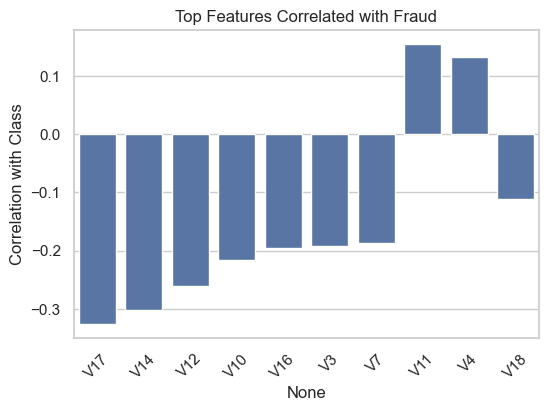

In [12]:
# === Correlation with Class ===
corrs = credit_df.corr(numeric_only=True)['Class'].sort_values(key=abs, ascending=False)[1:11]

print("Top Correlated Features with Fraud:")
print(corrs)

fig, ax = plt.subplots(figsize=(6, 4))
sns.barplot(x=corrs.index, y=corrs.values, ax=ax)
ax.set_title("Top Features Correlated with Fraud")
ax.set_ylabel("Correlation with Class")
plt.xticks(rotation=45)  # Rotation instead of set_xticklabels
save_plot(fig, "cc_top_corr_features.png")
plt.show()
